<a href="https://colab.research.google.com/github/MustofAhmed41/4-Wheel-Drive-Proteus/blob/master/Fully_Connected_Network_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

In [1]:
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras import activations
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

## Loading Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd'/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1'

/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1


## Deep Learning

In [7]:
load = pd.read_csv('thesis_processed.csv')

In [8]:
df = load.copy()

In [9]:
df.shape

(19434, 23)

In [10]:
def impute_classe(x):
  if x == 'Severe':
    return 4
  elif x =='Moderately Severe':
    return 3
  elif x=='Moderate':
    return 2
  elif x=='Mild':
    return 1
  elif x=='None':
    return 0

In [11]:
df['PHQ-Label'] = df['PHQ-Label'].apply(impute_classe)

In [12]:
df.head()

,Unnamed: 0,ACCELEROMETER_X,ACCELEROMETER_Y,ACCELEROMETER_Z,BATTERY_LEVEL,Light_v,GRAV_X,GRAV_Y,GRAV_Z,GYROSCOPE_X,...,MAG_Y,MAG_Z,ORIENTATION_AZIMUTH,ORIENTATION_PITCH,ORIENTATION_ROLL,SENSORGPS_LATITUDE,SENSORGPS_LONGITUDE,PHQ-Label,Gender_Female,Gender_Male
0,0,-1.175852,0.955269,0.304240,-1.394902,-0.072950,-1.219605,0.937280,0.309137,-0.017787,...,0.285328,-0.593778,0.534822,-0.726095,0.434159,0.491443,0.250215,4,1,0
1,1,-0.231706,0.288470,0.593060,-1.435221,-0.072950,-0.088856,0.299572,0.686943,-0.450174,...,0.436496,-0.438365,-0.321815,-0.160674,0.061857,0.491443,0.250215,4,1,0
2,2,0.468638,-0.365086,0.729825,-1.556179,-0.076481,0.476306,-0.398075,0.732500,-0.010941,...,-0.149468,0.322971,1.015806,0.451230,-0.126824,0.491443,0.250215,4,1,0
3,3,-0.123010,1.423019,0.119626,-1.636817,-0.084977,-0.136488,1.405023,0.107606,-0.029562,...,-1.789496,0.311330,-1.612450,-1.240857,0.061857,0.491443,0.250215,4,1,0
4,4,-0.997317,1.639032,-0.239259,-1.717455,-0.084977,-1.116351,1.592722,-0.317940,0.107356,...,-1.371912,0.819412,-1.226273,-1.512220,0.590078,0.491443,0.250215,4,1,0


In [13]:
df['PHQ-Label'].value_counts()

1    7861
2    7026
0    3509
3     606
4     432
Name: PHQ-Label, dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'ACCELEROMETER_X', 'ACCELEROMETER_Y', 'ACCELEROMETER_Z',
       'BATTERY_LEVEL', 'Light_v', 'GRAV_X', 'GRAV_Y', 'GRAV_Z', 'GYROSCOPE_X',
       'GYROSCOPE_Y', 'GYROSCOPE_Z', 'MAG_X', 'MAG_Y', 'MAG_Z',
       'ORIENTATION_AZIMUTH', 'ORIENTATION_PITCH', 'ORIENTATION_ROLL',
       'SENSORGPS_LATITUDE', 'SENSORGPS_LONGITUDE', 'PHQ-Label',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [15]:
lst = ['Unnamed: 0', 'PHQ-Label', 'Light_v', 'ORIENTATION_AZIMUTH', 'ORIENTATION_PITCH', 
       'ORIENTATION_ROLL',  'SENSORGPS_LATITUDE', 'SENSORGPS_LONGITUDE' ]
X=df.drop(lst, axis=1)
Y=df['PHQ-Label'] 

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

In [17]:
X_train

,ACCELEROMETER_X,ACCELEROMETER_Y,ACCELEROMETER_Z,BATTERY_LEVEL,GRAV_X,GRAV_Y,GRAV_Z,GYROSCOPE_X,GYROSCOPE_Y,GYROSCOPE_Z,MAG_X,MAG_Y,MAG_Z,Gender_Female,Gender_Male
426,-0.202257,-0.482234,0.771072,0.016271,-0.218125,-0.516998,0.777823,-0.010996,0.019418,-0.007909,1.114745,0.885054,-0.113745,0,1
15845,-0.515490,1.818540,-0.827423,1.306487,-0.149633,-0.432810,0.778154,-0.003982,-0.104758,-0.004413,0.442857,-1.116412,-0.263459,1,0
16171,-0.027706,-0.455181,0.794727,-0.024048,-0.039383,-0.490264,0.775807,-0.009354,0.017535,-0.008438,0.938187,-0.243185,-0.100248,0,1
7711,0.776607,1.518817,-0.306305,-0.709475,0.832177,1.540687,-0.284930,-0.019978,0.007500,-0.002880,0.157767,-0.752394,0.996558,0,1
14223,0.457294,-0.832700,0.687271,1.467763,0.470156,-0.877560,0.705363,-0.041611,0.010302,-0.006850,0.702859,0.136092,-0.375151,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,-0.106333,0.475722,0.623936,1.508083,-0.087546,0.728626,0.544624,-0.014775,0.033477,0.015120,0.888169,-0.829453,-0.269261,1,0
18106,-4.076908,-3.113549,-5.026417,-1.193306,-2.514517,-0.304879,-1.828560,-20.798877,-0.947677,-14.453593,0.371105,0.625500,0.993335,0,1
2908,-0.324908,0.301300,0.696279,1.629040,-0.333804,0.269383,0.693485,-0.077524,0.105755,-0.022416,0.277505,0.537721,-0.365382,0,1
13798,0.055102,0.360543,0.705480,1.306487,0.030751,0.327207,0.675765,-0.012311,0.020743,-0.015056,1.019067,0.979430,-0.640339,0,1


In [18]:
Y_train

426      1
15845    3
16171    2
7711     2
14223    1
        ..
6055     1
18106    0
2908     0
13798    1
9746     2
Name: PHQ-Label, Length: 15547, dtype: int64

In [19]:
dt = X_test.copy()
#dt['PHQ-Label'] = Y_test
dt.insert(loc = 0, column = "PHQ-Label", value = Y_test)
dt

,PHQ-Label,ACCELEROMETER_X,ACCELEROMETER_Y,ACCELEROMETER_Z,BATTERY_LEVEL,GRAV_X,GRAV_Y,GRAV_Z,GYROSCOPE_X,GYROSCOPE_Y,GYROSCOPE_Z,MAG_X,MAG_Y,MAG_Z,Gender_Female,Gender_Male
16679,3,0.415729,1.351016,0.070394,1.346806,0.404071,1.384936,0.066287,-0.042980,0.027365,0.038413,0.662910,-0.849558,-0.395579,0,1
18706,2,0.004868,-0.492246,-2.411595,-0.104686,0.000082,-0.527034,-2.495894,-0.013795,0.021614,-0.010667,-0.514362,1.163398,-0.060580,1,0
95,4,-0.136131,-0.361361,0.767580,0.661379,-0.149117,-0.393073,0.777629,-0.009572,0.016669,-0.009762,-1.063711,0.127799,-0.011765,1,0
17236,1,-0.918632,-0.483034,0.720852,-0.185325,-0.955179,-0.517199,0.720015,-0.008695,0.015496,-0.010027,1.231986,1.023427,-0.504730,0,1
12497,1,2.498892,0.121287,-0.279189,-0.709475,2.436752,0.066288,-0.310908,-0.009572,0.032968,-0.010291,-0.591061,-0.034595,-0.450949,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0,-0.175153,-0.455041,0.788565,-0.911071,-0.216167,-0.467887,0.778393,-0.004937,0.022259,-0.005798,0.573086,-0.216771,-0.301946,0,1
102,4,-0.609177,0.747806,0.539275,0.459783,-0.643176,0.702466,0.534028,-0.095283,0.042391,-0.011085,-0.255679,-1.287722,-0.098910,1,0
2183,0,0.051850,0.200272,0.747373,-0.588517,0.008269,0.226670,0.700789,0.814532,-0.176710,-0.027955,0.173504,0.638933,-0.513916,0,1
3921,0,1.804858,0.777190,-0.119240,-0.588517,1.864992,0.762427,-0.112079,0.023716,0.038248,-0.018723,-0.808119,-0.816685,0.921905,0,1


In [20]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 2807, 1: 6289, 2: 5621, 3: 485, 4: 345}

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [22]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 6289, 1: 6289, 2: 6289, 3: 6289, 4: 6289}

In [23]:
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Vs Epoch')

        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [24]:
X_train, Y_train = x_train_res, y_train_res

In [25]:
ds = X_train.copy()
ds

,ACCELEROMETER_X,ACCELEROMETER_Y,ACCELEROMETER_Z,BATTERY_LEVEL,GRAV_X,GRAV_Y,GRAV_Z,GYROSCOPE_X,GYROSCOPE_Y,GYROSCOPE_Z,MAG_X,MAG_Y,MAG_Z,Gender_Female,Gender_Male
0,-0.202257,-0.482234,0.771072,0.016271,-0.218125,-0.516998,0.777823,-0.010996,0.019418,-0.007909,1.114745,0.885054,-0.113745,0,1
1,-0.515490,1.818540,-0.827423,1.306487,-0.149633,-0.432810,0.778154,-0.003982,-0.104758,-0.004413,0.442857,-1.116412,-0.263459,1,0
2,-0.027706,-0.455181,0.794727,-0.024048,-0.039383,-0.490264,0.775807,-0.009354,0.017535,-0.008438,0.938187,-0.243185,-0.100248,0,1
3,0.776607,1.518817,-0.306305,-0.709475,0.832177,1.540687,-0.284930,-0.019978,0.007500,-0.002880,0.157767,-0.752394,0.996558,0,1
4,0.457294,-0.832700,0.687271,1.467763,0.470156,-0.877560,0.705363,-0.041611,0.010302,-0.006850,0.702859,0.136092,-0.375151,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31440,-2.724523,0.013850,-0.496892,0.294739,-2.643412,0.053575,-0.638496,0.001680,0.048107,0.008924,1.542362,-0.248441,0.164605,0,0
31441,1.828391,0.564801,-1.720038,1.626706,1.869174,0.548930,-1.735499,-0.016231,0.018638,-0.003932,-0.046497,0.073199,0.822812,0,1
31442,-2.168578,1.067080,-1.084366,-1.898722,-2.279600,0.966546,-1.273072,-0.078020,-0.412801,0.105917,0.303800,-1.408742,0.501486,1,0
31443,-0.138909,-0.340827,0.776097,0.265996,-0.151730,-0.372996,0.776455,-0.010129,0.016734,-0.008677,0.063036,-0.415136,-0.346563,1,0


In [26]:
#ds['PHQ_Label'] = Y_train
ds.insert(loc = 0, column = "PHQ-Label", value = Y_train)
ds.head()

,PHQ-Label,ACCELEROMETER_X,ACCELEROMETER_Y,ACCELEROMETER_Z,BATTERY_LEVEL,GRAV_X,GRAV_Y,GRAV_Z,GYROSCOPE_X,GYROSCOPE_Y,GYROSCOPE_Z,MAG_X,MAG_Y,MAG_Z,Gender_Female,Gender_Male
0,1,-0.202257,-0.482234,0.771072,0.016271,-0.218125,-0.516998,0.777823,-0.010996,0.019418,-0.007909,1.114745,0.885054,-0.113745,0,1
1,3,-0.515490,1.818540,-0.827423,1.306487,-0.149633,-0.432810,0.778154,-0.003982,-0.104758,-0.004413,0.442857,-1.116412,-0.263459,1,0
2,2,-0.027706,-0.455181,0.794727,-0.024048,-0.039383,-0.490264,0.775807,-0.009354,0.017535,-0.008438,0.938187,-0.243185,-0.100248,0,1
3,2,0.776607,1.518817,-0.306305,-0.709475,0.832177,1.540687,-0.284930,-0.019978,0.007500,-0.002880,0.157767,-0.752394,0.996558,0,1
4,1,0.457294,-0.832700,0.687271,1.467763,0.470156,-0.877560,0.705363,-0.041611,0.010302,-0.006850,0.702859,0.136092,-0.375151,1,0


In [27]:
ds.shape

(31445, 16)

In [28]:
ds.to_csv('train.csv', index=False, header=None, float_format="%.4f")
dt.to_csv('test.csv', index=False, header=None, float_format="%.4f")

In [29]:
ds['PHQ-Label'].value_counts()

1    6289
3    6289
2    6289
0    6289
4    6289
Name: PHQ-Label, dtype: int64

In [30]:
model=tf.keras.Sequential([
          tf.keras.layers.Dense(250,activation='relu',input_shape=(X.shape[1],)),         
          tf.keras.layers.Dense(500,activation='relu'),  
          tf.keras.layers.Dense(1000,activation='relu'),  
          tf.keras.layers.Dense(5,activation='softmax')           
])

In [31]:
from tensorflow import keras
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               4000      
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dense_2 (Dense)             (None, 1000)              501000    
                                                                 
 dense_3 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 635,505
Trainable params: 635,505
Non-trainable params: 0
_________________________________________________________________


In [33]:
tf.keras.utils.set_random_seed(100)

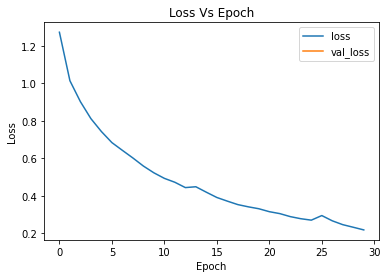

In [34]:
trained_model=model.fit(X_train,Y_train,epochs=30, batch_size=64, callbacks=[plot_losses], verbose=0, )

In [35]:
Y_pred = model.predict(X_test)

In [36]:
Y_pred

array([[5.20543531e-02, 6.18174732e-01, 1.03377461e-01, 2.26393387e-01,
        8.69420438e-11],
       [1.12889850e-07, 1.35896266e-01, 8.64089787e-01, 1.37526604e-05,
        1.28067973e-10],
       [9.49184323e-06, 5.10284565e-02, 1.76651939e-03, 1.42645593e-08,
        9.47195530e-01],
       ...,
       [9.98708963e-01, 9.65298328e-04, 3.25734756e-04, 1.07945795e-08,
        4.00030925e-10],
       [9.89931345e-01, 3.93371825e-04, 6.88527990e-03, 1.68764623e-12,
        2.79014511e-03],
       [2.16992066e-06, 2.03551399e-03, 9.97962356e-01, 2.95766633e-09,
        7.26495863e-10]], dtype=float32)

In [37]:
Y_pred = Y_pred.argmax(axis=1) 
Y_pred

array([1, 2, 4, ..., 0, 0, 2])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       702
           1       0.69      0.84      0.76      1572
           2       0.82      0.54      0.65      1405
           3       0.39      0.60      0.47       121
           4       0.45      0.55      0.49        87

    accuracy                           0.70      3887
   macro avg       0.61      0.66      0.62      3887
weighted avg       0.72      0.70      0.70      3887



In [39]:
accuracy_score(Y_test, Y_pred)

0.7015693336763571

In [40]:
confusion_matrix(Y_test,Y_pred)

array([[ 526,   99,   49,   19,    9],
       [  90, 1321,   98,   44,   19],
       [ 135,  436,  760,   46,   28],
       [   5,   32,    9,   72,    3],
       [   9,   15,   10,    5,   48]])

In [41]:
pd.crosstab(Y_test,Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,526,99,49,19,9,702
1,90,1321,98,44,19,1572
2,135,436,760,46,28,1405
3,5,32,9,72,3,121
4,9,15,10,5,48,87
All,765,1903,926,186,107,3887


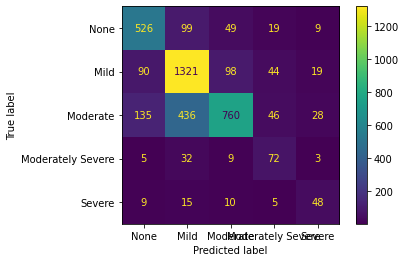

In [42]:
cm = confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(cm, display_labels=['None', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']).plot()

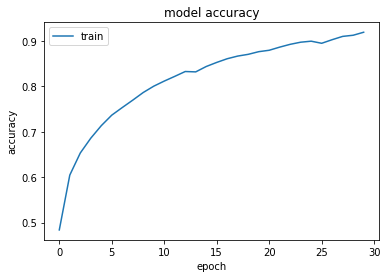

In [43]:
plt.plot(trained_model.history['accuracy'])
#plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

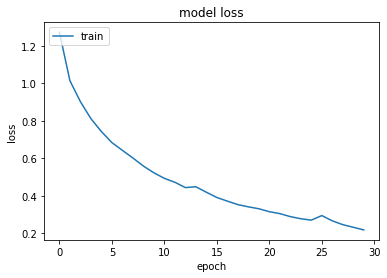

In [44]:
plt.plot(trained_model.history['loss'])
#plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

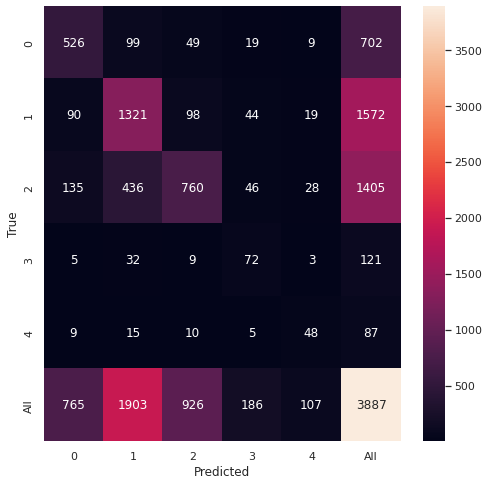

In [45]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(pd.crosstab(Y_test,Y_pred, rownames=['True'], colnames=['Predicted'], margins=True), annot=True, fmt='g')

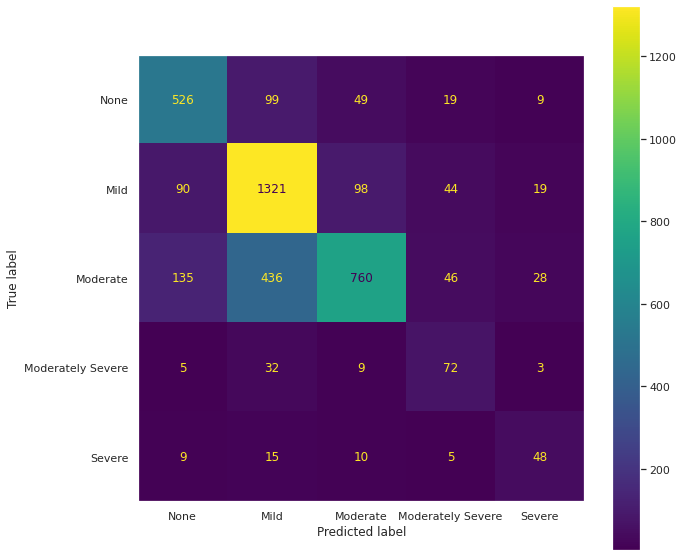

In [46]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cmp = ConfusionMatrixDisplay(cm, display_labels=['None', 'Mild', 'Moderate', 'Moderately Severe', 'Severe'])
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)
plt.grid(b=None)